In [79]:
import tensorflow as tf

from keras.layers import Dense, Flatten
from keras.losses import categorical_crossentropy


import numpy as np
import matplotlib.pyplot as plt
import json


from IPython import display
%matplotlib inline

In [84]:
def plot_gr(gr, start=0, end=-1, log = False, all_ticks = False,  s=10):
    plt.figure(figsize=(s,s))
    if end == -1:
        end = gr.shape[0]
    if log:
        plt.imshow(np.log(gr[start:end,start:end] + 1))
    else:
        plt.imshow(gr[start:end,start:end])
    plt.colorbar()
    if all_ticks: 
        plt.xticks(np.arange(start,end))
        plt.yticks(np.arange(start,end))
    plt.show()

In [36]:
synthetic_populations = np.load("../data/simulation/init5k/populations.npy")
y = np.load("../data/simulation/init5k/populations_gr.npy")
X = np.load("../data/simulation/init5k/amp_gr.npy")

params = json.load(open("../data/simulation/init5k/params.json", 'r'))

In [7]:
params

{'AMPLIFY_PROB': 0.35,
 'MAX_LEN': 10,
 'MAX_POPULATION_SIZE': 10000,
 'N_CHAINS': 6,
 'N_POPULATONS': 5000,
 'N_SPACERS': 10,
 'STOP_PROB': 0,
 'SWITCH_PROB': 0.05}

In [65]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [66]:
inp = tf.placeholder(tf.float32, [None, params["N_SPACERS"] * params["N_SPACERS"]])

#flatten = Flatten()(inp)
dense_1 = Dense(100, activation=tf.nn.relu)(inp)
dense_2 = Dense(100, activation=tf.nn.relu)(dense_1)

out = Dense(params["N_SPACERS"] * params["N_SPACERS"], activation=tf.nn.sigmoid)(dense_2)

In [67]:
target = tf.placeholder(tf.float32, [None, params["N_SPACERS"]* params["N_SPACERS"]])

In [68]:
#loss = tf.reduce_mean(categorical_crossentropy(target, inp))
loss = tf.reduce_mean(tf.losses.mean_squared_error(target, out))

In [69]:
optimizer = tf.train.AdamOptimizer()
train_step = optimizer.minimize(loss)

In [70]:

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [71]:
gr = tf.get_default_graph()

writer = tf.summary.FileWriter("../tf_logs", gr)

In [73]:
sess.run(loss, feed_dict = {inp : amp_graphs[:50].reshape(-1,100), target :initial_graphs[:50].reshape(-1,100)})

0.49618858

In [74]:
losses_each_n = []
val_losses = []
val_x = []
n = 50
curr_loss = 0


In [82]:
epochs = 100

In [77]:
def iterate_minibatches(x, y, batchsize, shuffle=True):
    if shuffle:
        indices = np.arange(y.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, y.shape[0] - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield x[excerpt].reshape(-1,params["N_SPACERS"] * params["N_SPACERS"]), y[excerpt].reshape(-1,params["N_SPACERS"] * params["N_SPACERS"])

In [83]:
for epoch in range(epochs):
    for i, (batch_X, batch_y) in enumerate(iterate_minibatches(X[:4000], y[:4000], 20)):

        batch_loss = sess.run([train_step,loss], feed_dict={inp : batch_X, target: batch_y})
        curr_loss += batch_loss[1]

        if i % n == 0:
            if i != 0:
                losses_each_n.append( curr_loss / n)
            
            curr_loss = 0


            display.clear_output(wait=True)
            plt.plot(losses_each_n[1:], label='train')
            plt.plot(val_x, val_losses, label='test')
            plt.legend()
            plt.show()
            
    val_loss = sess.run(loss,  feed_dict={inp : X[4000:].reshape(-1, 100), target: y[4000:].reshape(-1, 100)})
    val_losses.append(val_loss)
    val_x.append(len(losses_each_n))
    
    curr_loss == 0

        #print(batch_loss[1])

KeyboardInterrupt: 

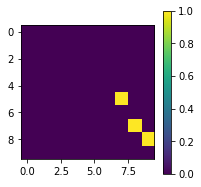

In [98]:
gr = sess.run(out, feed_dict = {inp : X[10].reshape(-1,100)}).reshape(10,10)
plot_gr(gr,s = 3)

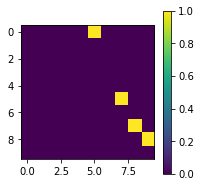

In [99]:
plot_gr(y[10],s =3)

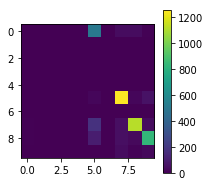

In [103]:
plot_gr(X[10],s=3)

In [100]:
gr

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.00